<a href="https://colab.research.google.com/github/Manikanta-Munnangi/CROP---Plant-Disease-Identification-Using-App/blob/master/Cnn-Code/Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Mounting Dataset From Drive.`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `1.Import Libraries.`

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np

import os
import glob
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


# `2.Load Data into Train and Test Variables.`

In [ ]:
# My data is in google drive.
train_dir ="/content/drive/MyDrive/papaya data sets/Datasets/train/"
test_dir="/content/drive/MyDrive/papaya data sets/Datasets/test/"

# `3.Function To count Images In Each Data Set.`

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

3 Classes
1846 Train images
73 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256  # mobile net requires that the input shape is 224 x 224 x3
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 1846 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


In [ ]:
# The name of the diseases.
train_generator.class_indices

{'blackspot': 0, 'brownspot': 1, 'healthy': 2}

In [ ]:
#getting mobilenet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL,input_shape=(img_width,img_height,3))



# `4.CNN Parameter Building.`

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 23104)            

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11', 'flatten_3', 'dense_9', 'dropout_3', 'dense_10', 'dense_11']


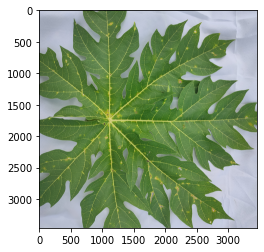

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/papaya data sets/Datasets/train/brownspot/IMG20201117101308.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/papaya data sets/Datasets/train/brownspot/IMG20201117101308.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_6_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_6').output)
max_pooling2d_6_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_6').output)
conv2d_7_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_7').output)
max_pooling2d_7_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_7').output)
conv2d_8_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_8').output)
max_pooling2d_8_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_8').output)
flatten_2_output = Model(inputs=model.input,outputs=model.get_layer('flatten_2').output)
conv2d_6_features = conv2d_6_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
#conv2d_3_features = conv2d_3_output.predict(img)
#max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten__features = flatten__output.predict(img)

ValueError: ignored

# `5.Visualizing The Image After Every Layer.`

NameError: ignored

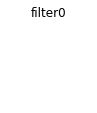

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

NameError: ignored

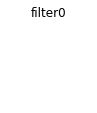

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

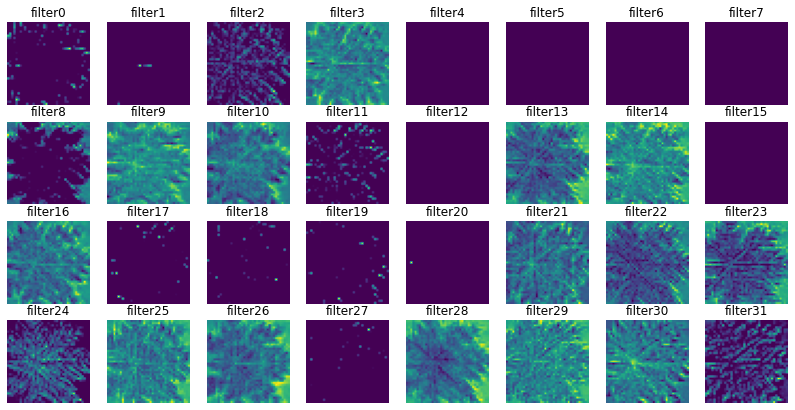

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

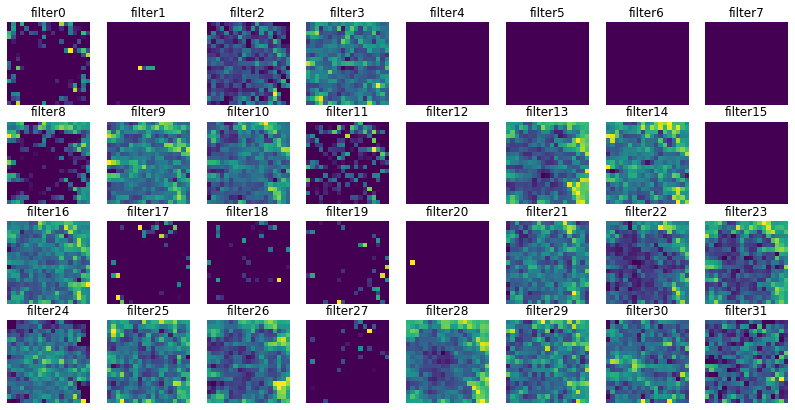

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

# `6.Training The Model.`

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 1846 images belonging to 3 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=5,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                         validation_steps= validation_generator.samples // batch_size,verbose=1)



Epoch 1/20


KeyboardInterrupt: ignored

# `7.Plot For Accuracy And Losses.`

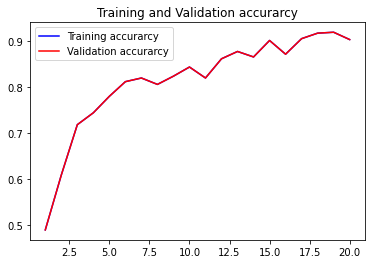

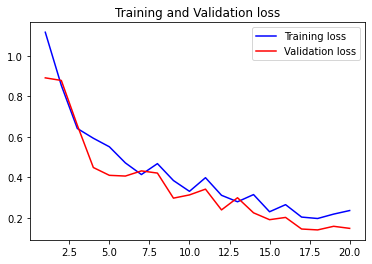

In [ ]:
acc=train.history['accuracy']
val_acc = train.history['accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# `8. Evaluate model using unseen data.`


In [ ]:
##score,accuracy =model.evaluate(test_generator,verbose=1)
##print("Test score is {}".format(score))
#print("Test accuracy is {}".format(accuracy))

# `9.Saving Model.`

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices
classes


{'blackspot': 0, 'brownspot': 1, 'healthy': 2}

# `10.Load Model.`

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["blackspot","brownspot","healthy"]


# `11.Time For Predictions.`

brownspot


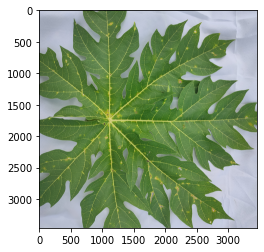

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = model.predict_classes([prepare('/content/drive/MyDrive/papaya data sets/Datasets/train/brownspot/IMG20201117101308.jpg')])
disease=image.load_img('/content/drive/MyDrive/papaya data sets/Datasets/train/brownspot/IMG20201117101308.jpg')
plt.imshow(disease)
print (Classes[int(result)])

# `12.Convert Model To "tflite format."`.
- This conversion is done because to make our model interpertable with App.
- tflite is tensorflowlite made for mobile versions.

In [ ]:
import tensorflow as tf

#converter = tf.lite.TFLiteConverter.from_keras_model_file('crop.h5')
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('crop.h5')
tfmodel = converter.convert()
open ("output.tflite" , "wb") .write(tfmodel)




Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp_o5qy9uy/assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from /tmp/tmp_o5qy9uy/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input
INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 256, 256, 3), type: DT_FLOAT
INFO:tensorflow:output te

47708008